# import necessary libraries: #

In [9]:
import os
import sys
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


I used the R to convert dat file to csv file. If you want to see my R code, please check:
https://github.com/mukoedo1993/Econ_515_project/blob/master/3rd_assignment/3rd_assignment.R

In [18]:
processed_data=pd.read_csv("processed_data.csv")
#You could also check it on:
#https://github.com/mukoedo1993/Econ_515_project/blob/master/3rd_assignment/processed_data.csv
processed_data#print the data
#We could find that we need to delete the unnamed column.

,Unnamed: 0,X16.00
0,1,4.795832
1,2,6.000000
2,3,7.615773
3,4,5.385165
4,5,4.472136
...,...,...
277,278,12.437845
278,279,11.853270
279,280,10.765686
280,281,8.160882


# Process the data and plot it: #

In [23]:
processed_data = processed_data.loc[:, ~processed_data.columns.str.contains('^Unnamed')]
                          

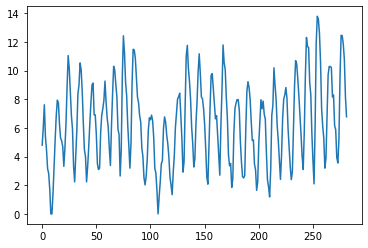

In [24]:
plt.plot(processed_data)

# Plot the ACF: #

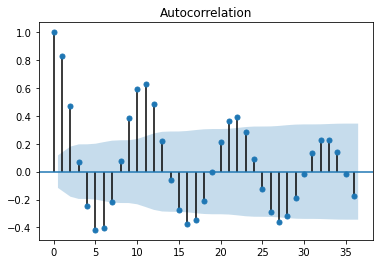

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(processed_data.values.squeeze(), lags=36)
plt.show()

# Plot the PACF: #

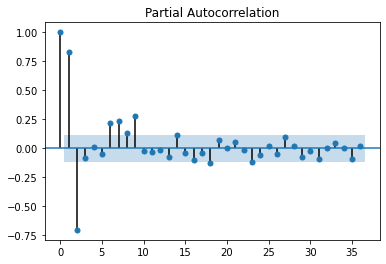

In [27]:
sm.graphics.tsa.plot_pacf(processed_data.values.squeeze(), lags=36)
plt.show()

# Short summary from ACF and PACF: #
We could find that, on PACF, it expreiences siginificant spikes until lag=1. And, from ACF plot,
we could find that on ACF, it decays with a damped sine-like waves pattern.
So, it should be a AR(1) model.

# Estimate the coefficient #

In [31]:
from statsmodels.tsa.arima_model import ARMA
mod=ARMA(processed_data,order=(1,0))
result=mod.fit()
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                 X16.00   No. Observations:                  282
Model:                     ARMA(1, 0)   Log Likelihood                -536.568
Method:                       css-mle   S.D. of innovations              1.619
Date:                Thu, 15 Oct 2020   AIC                           1079.136
Time:                        06:56:07   BIC                           1090.062
Sample:                             0   HQIC                          1083.518
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.3648      0.547     11.646      0.000       5.294       7.436
ar.L1.X16.00     0.8265      0.033     25.029      0.000       0.762       0.891
                                    Roots   

In [32]:
print(result.params)

const           6.364798
ar.L1.X16.00    0.826509
dtype: float64


# Final conclusion: #
So, our AR(1) model should be: 

\begin{align}
R_t & = \mu + \phi_1 R_{t-1} + \epsilon_t \\
\mu=6.364798\\
\phi_1=0.826509\\
\end{align}